<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week03-MLR/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate linear regresion

# **Normal equation**

<class 'numpy.ndarray'>
theta =  [-12.21720169  20.49484561  13.80062778  -0.45405551]
y predict =  [-36.8404103  111.04744928]


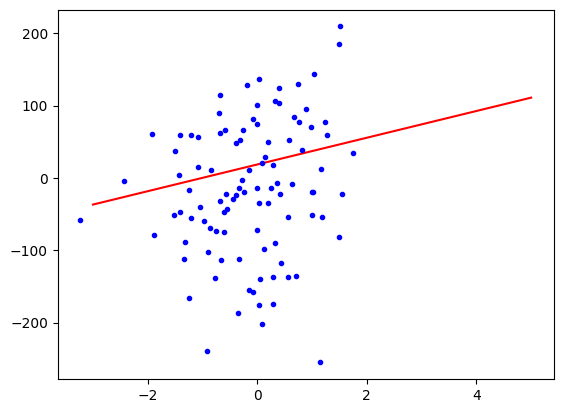

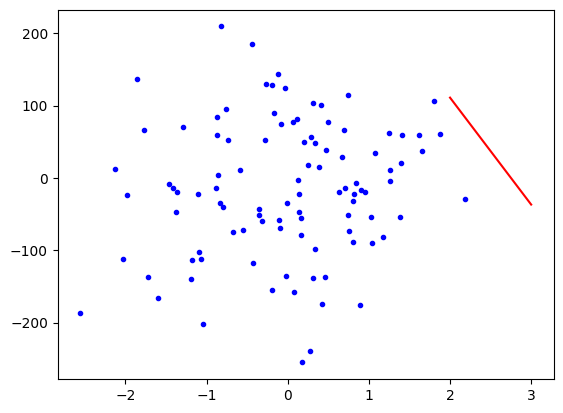

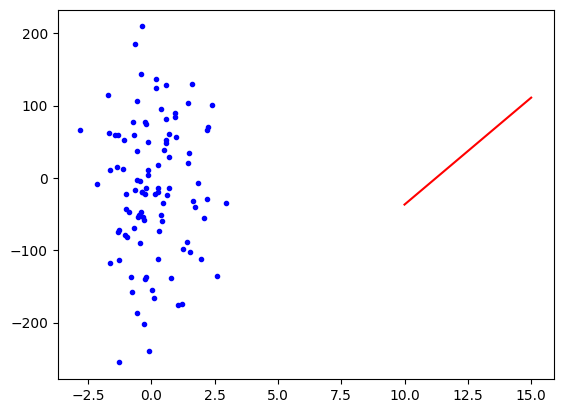

In [10]:
import numpy as np
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=100, n_features=3, n_informative=1, random_state=123, noise=100)
print(type(x))
#print(x)
x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta_best)

#prediction
x_n = np.array([[-3,3,10],[5,2,15]])
x_n_b = np.c_[np.ones((x_n.shape[0],1)), x_n]
y_p = x_n_b.dot(theta_best)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n[:,0], y_p,"r-")
plt.plot(x[:,0],y, "b.")
plt.show()

plt.plot(x_n[:,1], y_p,"r-")
plt.plot(x[:,1],y, "b.")
plt.show()

plt.plot(x_n[:,2], y_p,"r-")
plt.plot(x[:,2],y, "b.")
plt.show()


Exercise1 <br>
1.1 Change a number of features to 4 (x1,x2,x3,x4) and plot 4 graphs </br>
1.2 Change a number of features to 2 (x1,x2) and use plotly to plot 3D visualization (x1,x2,y).

# **Sklearn**

-26.740595297087438  ,  [46.20215542 -5.04125804  3.37581693]
y predict =  [-146.71266643  244.82491962]


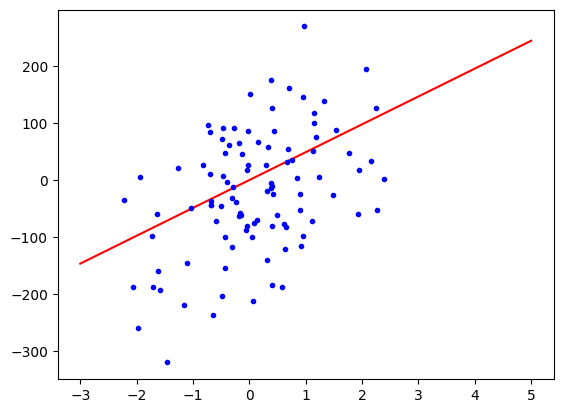

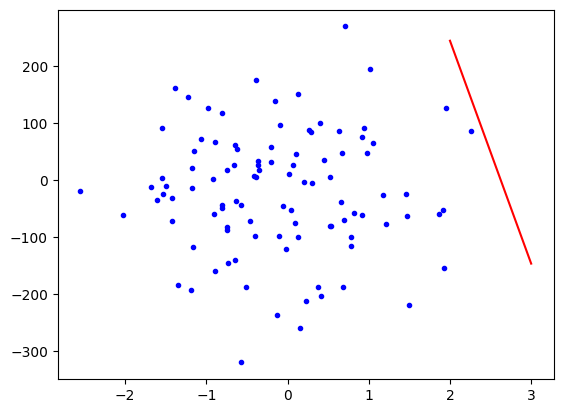

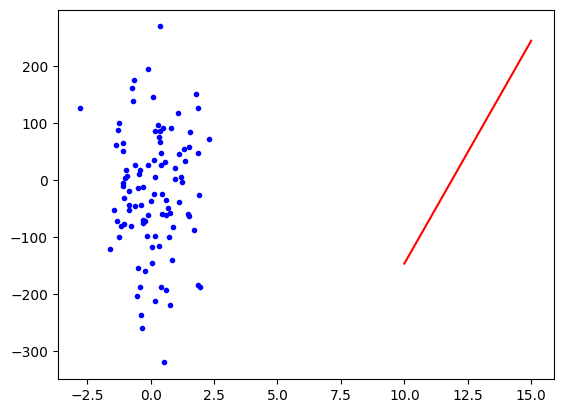

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

#x, y = make_regression(n_samples=1000, n_features=2, n_informative=1, random_state=0, noise=100)
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)


#prediction
#x_n = np.array([[-3,3],[5,2]])
y_p = lin_reg.predict(x_n)
print("y predict = ",y_p)

import matplotlib.pyplot as plt
plt.plot(x_n[:,0], y_p,"r-")
plt.plot(x[:,0],y, "b.")
plt.show()

plt.plot(x_n[:,1], y_p,"r-")
plt.plot(x[:,1],y, "b.")
plt.show()

plt.plot(x_n[:,2], y_p,"r-")
plt.plot(x[:,2],y, "b.")
plt.show()

# **Batch Gradient descent (Multiple linear regression)**


Converged, iterations:  1208 / 100000
theta  [[-26.7380354 ]
 [ 46.20025696]
 [ -5.0390913 ]
 [  3.37435878]]


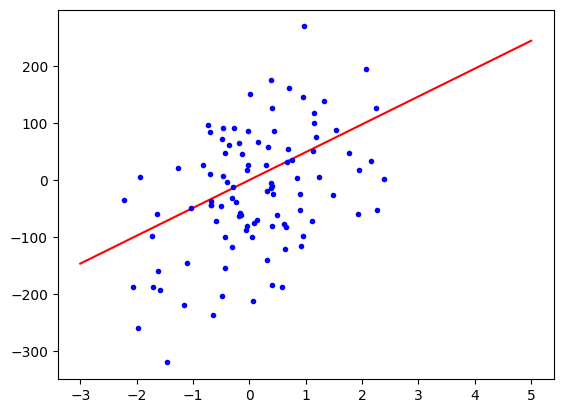

BGD
Mean of Squared Errors =  9321.122066138285
R2 score =  0.1915055776012371


In [3]:
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt
from scipy import stats

def cost_function(theta, x, y, m):

    y_predict = theta.T.dot(x.T)
    #print("y_predict ",y_predict)
    error = (1/(2*m))*np.sum((y_predict-y)**2)
    #print("error ", error)
    return error

def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))
    #t = np.ones((x.shape[1],1))
    #print("t ", t)

    # total error, J(theta)
    J = cost_function(t,x,y,m)
    #print("Iteration 0 --> J=",J," t0=",t0," t1=",t1)

    # Iterate Loop
    while not converged:

        #print("theta.shape ",t.shape)
        #print("x.shape ",x.shape)
        y_predict = t.T.dot(x.T)
        error = y_predict-y
        grad = x.T.dot(error.T)

        #grad = x.T.dot(((t.T.dot(x.T)-y).T))

        t = t - alpha * (1/m) * (grad)

        # error
        e = cost_function(t,x,y,m)

        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True

        J = e   # update error s
        iter += 1  # update iter

        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t


if __name__ == '__main__':

    alpha = 0.01 # learning rate

    theta_bgd = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta_bgd)

    y_p = x_n_b.dot(theta_bgd)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()


    #Evaluation
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    y3_p = x_b.dot(theta_bgd)

    print("BGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y3_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y3_p))


# Stochastic GD

Max iterations exceeded!
theta  [[-24.87422103]
 [ 47.97703395]
 [ -8.00177914]
 [  4.60814075]]


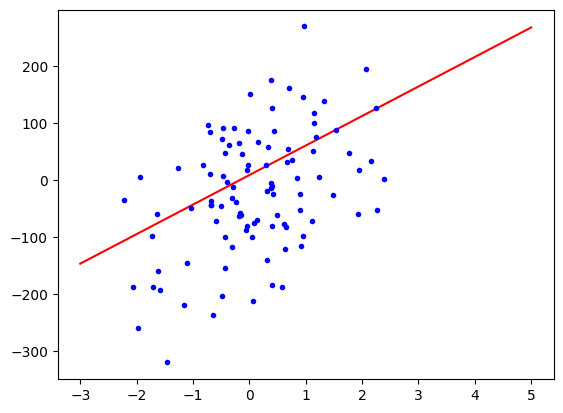

SGD
Mean of Squared Errors =  9339.381056317172
R2 score =  0.18992183139412622


In [4]:
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
import time


def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.0000001, max_iter=100000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))

    # total error, J(theta)
    J = cost_function(t,x,y,m)

    # Iterate Loop
    while not converged:


        rand_ind = np.random.randint(0,m)
        #print(rand_ind)
        X_i = x[rand_ind,:]
        y_i = y[rand_ind].reshape(1,1)

        y_predict = t.T.dot(X_i)
        error = y_predict-y_i
        X_i = X_i.reshape(1,x.shape[1])
        grad = X_i.T.dot(error.T)

        alpha = 0.001 #Learning rate
        decay = alpha/max_iter
        alpha *= 1/(1+decay*iter)
        #print("learning schedule = ", alpha)

        t = t - alpha * (1/1) * (grad)

        # error
        e = cost_function(t,X_i,y_i,m)

        if abs(J-e) <= ep:
            print("Converged, iterations: ", iter, "/", max_iter)
            converged = True

        J = e   # update error s
        iter += 1  # update iter

        if iter == max_iter:
            print('Max iterations exceeded!')
            converged = True

    return t


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=2, n_informative=1, random_state=0, noise=35)
    #x_b = np.c_[np.ones((x.shape[0],1)),x]

    alpha = 0.01 # learning rate

    theta_sgd = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta_sgd)

    y_p = x_n_b.dot(theta_sgd)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    y2_p = x_b.dot(theta_sgd)
    #print("y predict = ",y2_p)

    print("SGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y2_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y2_p))


# Mini-batch GD

Max iterations exceeded!
theta  [[-26.66341506]
 [ 46.21326842]
 [ -5.06907417]
 [  3.35386525]]


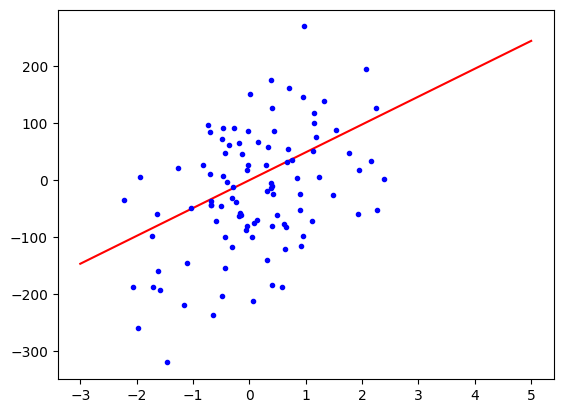

miniGD
Mean of Squared Errors =  9339.381056317172
R2 score =  0.18992183139412622


In [5]:
import numpy as np
import random
import sklearn
import matplotlib.pyplot as plt
from scipy import stats
import time

def cost_function(theta, x, y, m):
    y_predict = theta.T.dot(x.T)
    error = np.sum((y_predict-y)**2)
    return error

def gradient_descent(alpha, x, y, ep=0.00000001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t = np.random.random((x.shape[1],1))

    # total error, J(theta)
    J = cost_function(t,x,y,m)

    batch_size = 10

    # Iterate Loop
    while not converged:

        #shuffle
        rand_ind = np.random.permutation(m)
        #print(rand_ind)
        x = x[rand_ind]
        y = y[rand_ind]

        for i in range(0,m,batch_size):
            #print("i",i)

            X_i = x[i:i+batch_size]
            #print("X_i", X_i)
            y_i = y[i:i+batch_size]
            #print("y_i", y_i)

            y_predict = t.T.dot(X_i.T)
            error = y_predict-y_i
            grad = X_i.T.dot(error.T)

            t = t - alpha * (1/batch_size) * (grad)

            # error
            e = cost_function(t,X_i,y_i,m)

            if abs(J-e) <= ep:
                print("Converged, iterations: ", iter, "/", max_iter)
                converged = True

            J = e   # update error s
            iter += 1  # update iter

            if iter == max_iter:
                print('Max iterations exceeded!')
                converged = True

    return t


if __name__ == '__main__':

    alpha = 0.01 # learning rate

    theta = gradient_descent(alpha, x_b, y, max_iter=100000)
    print ("theta ", theta)

    y_p = x_n_b.dot(theta)

    import matplotlib.pyplot as plt
    plt.plot(x_n[:,0], y_p,"r-")
    plt.plot(x[:,0],y, "b.")
    plt.show()

    from sklearn.metrics import mean_squared_error
    #from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    y2_p = x_b.dot(theta_sgd)
    #print("y predict = ",y2_p)

    print("miniGD")
    print("Mean of Squared Errors = ", mean_squared_error(y, y2_p))
    #print("Mean of Absolute Errors = ", mean_absolute_error(x_b[:,1], y2_p))
    print("R2 score = ", r2_score(y, y2_p))

# Polynomial regression
Reference: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
print(df.head())
print(X)
print(y)

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


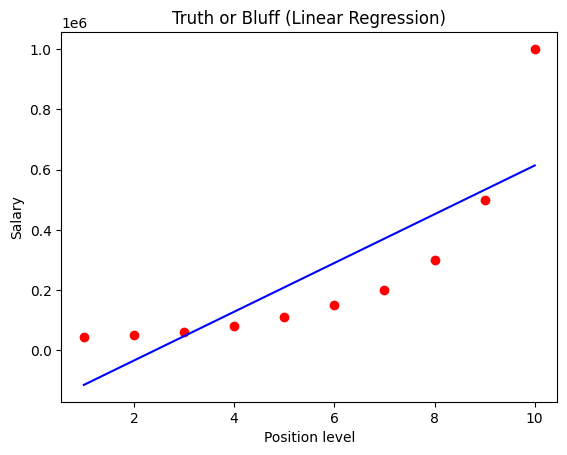

In [7]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(y)
# Visualizing the Linear Regression results

plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


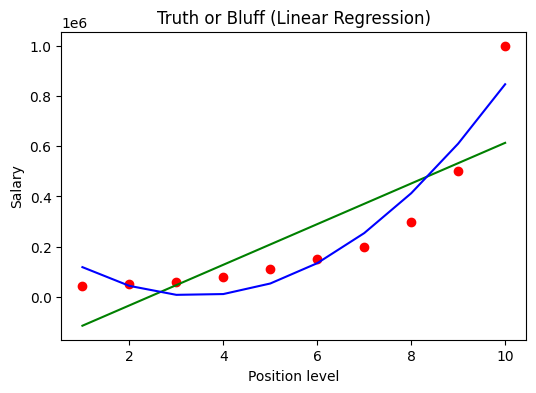

In [8]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
print(X_poly)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
plt.figure(figsize=(6,4))
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='green')
plt.plot(X, pol_reg.predict(X_poly), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [9]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))
#output should be 249500

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.fit_transform([[5.5]])))
#output should be 132148.43750003

[249500.]
[89187.5]


#timeit, m=1M
#m=10, print line by line